<a href="https://colab.research.google.com/github/YiXin521/Python-practice/blob/master/Deep_Learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Practice] Deep Learning with PyTorch

This practice is referenced from Microsoft Machine Learning Courses [Deep Learning with PyTorch](https://github.com/MicrosoftDocs/ml-basics/blob/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/05a%20-%20Deep%20Neural%20Networks%20(PyTorch).ipynb)


In [59]:
import pandas as pd

url = "https://github.com/MicrosoftDocs/ml-basics/blob/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/data/penguins.csv?raw=true"
penguins = pd.read_csv(url).dropna()
penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.757310
std,5.459584,1.974793,14.061714,801.954536,0.763648
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [60]:
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,20.091520,42.017544,0.757310
std,5.459584,1.974793,1.406171,8.019545,0.763648
min,32.100000,13.100000,17.200000,27.000000,0.000000
25%,39.225000,15.600000,19.000000,35.500000,0.000000
50%,44.450000,17.300000,19.700000,40.500000,1.000000
75%,48.500000,18.700000,21.300000,47.500000,1.000000
max,59.600000,21.500000,23.100000,63.000000,2.000000


In [61]:
for i in range(0,4):
    penguins = penguins.append(penguins)
print(len(penguins))


5472


In [62]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass'] # X data
label = 'Species' # y data
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']

In [63]:
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

In [64]:
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))

Training Set: 3830, Test Set: 1642 



In [65]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 1717, 1: 1355, 2: 758})
Counter({0: 699, 1: 613, 2: 330})


# Install and import the PyTorch libraries

In [66]:
!pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [67]:
import torch
import torch.nn as nn
import torch.utils.data as td

test_sample = torch.rand(5, 3)
print(x)

tensor([[  52.2000,   18.8000,  197.0000, 3450.0000]])


## We need to convert numpy array to Pytorch Tensor objects.

**TORCH.TENSOR**  
A **torch.Tensor** is a multi-dimensional matrix containing elements of a single data type.[link](https://pytorch.org/docs/stable/tensors.html)




In [68]:
# Create a dataset and loader for the training data and labels

# Converted the training data
train_x = torch.Tensor(x_train).float() # Features
train_y = torch.Tensor(y_train).long() # Label
# Tensor Dataset
train_ds = td.TensorDataset(train_x,train_y)
# Tensor DataLoader
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Create a dataset and loader for the test data and labels
# Converted
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
# Tensor Dataset
test_ds = td.TensorDataset(test_x,test_y)
# Tensor DataLoader
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)

print('Ready to load data')

Ready to load data


A Basic Concept of deep neural network model:

The deep neural network model for the classifier consists of multiple layers of artificial neurons.

* An input layer with a neuron for each expected input for each feature (in this case, the four penguin measurements) 
* Hidden layers, each containing X(self-define) neurons. In this case we use 10 neurons. (user can create multi hidden layers)
* An output layer containing X neurons - one for each classification probability (y) value to be predicted by the model.

[ReLU activation function](https://www.mygreatlearning.com/blog/relu-activation-function/)



In [69]:
# Number of hidden layer nodes
hl = 10

# Define the neural network, here we make 3 fully-connected layers:
class PenguinClass(nn.Module):
    def __init__(self):
        super(PenguinClass, self).__init__()
        self.fc1 = nn.Linear(len(features), hl) # Input Layer: from 4 features to 10 nodes
        self.fc2 = nn.Linear(hl, hl) # Hidden Layer with 10 nodes
        self.fc3 = nn.Linear(hl, len(penguin_classes)) # Output Layer: from 10 nodes to 3 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Create a model instance from the network
model = PenguinClass()
print(model)

PenguinClass(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


***f{ x, w, b}***  
Associated with each x value is a weight (w), which is used to strengthen or weaken the effect of the x value to simulate learning. Additionally, a bias (b) input is added to enable fine-grained control over the network. During the training process, the w and b values will be adjusted to tune the network so that it "learns" to produce correct outputs.

In [70]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 0.911789
Validation set: Average loss: 0.811156, Accuracy: 1007/1642 (61%)

Epoch: 2
Training set: Average loss: 0.807213
Validation set: Average loss: 0.754013, Accuracy: 1157/1642 (70%)

Epoch: 3
Training set: Average loss: 0.770882
Validation set: Average loss: 0.726945, Accuracy: 1230/1642 (75%)

Epoch: 4
Training set: Average loss: 0.728730
Validation set: Average loss: 0.669720, Accuracy: 1131/1642 (69%)

Epoch: 5
Training set: Average loss: 0.690372
Validation set: Average loss: 0.637571, Accuracy: 1245/1642 (76%)

Epoch: 6
Training set: Average loss: 0.656844
Validation set: Average loss: 0.604288, Accuracy: 1333/1642 (81%)

Epoch: 7
Training set: Average loss: 0.622225
Validation set: Average loss: 0.572664, Accuracy: 1400/1642 (85%)

Epoch: 8
Training set: Average loss: 0.591374
Validation set: Average loss: 0.547215, Accuracy: 1484/1642 (90%)

Epoch: 9
Training set: Average loss: 0.567135
Validation set: Average loss: 0.528795, Accuracy: 

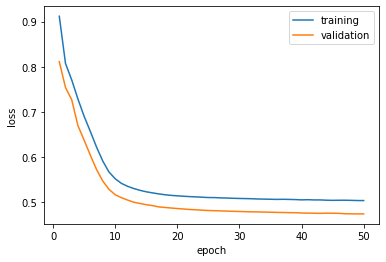

In [71]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

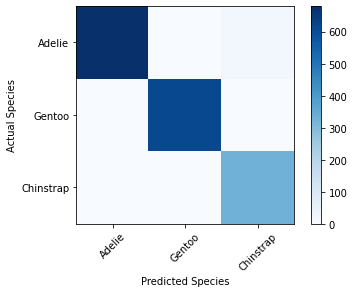

In [72]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [73]:
model.eval()
# New penguin features
x_new = [[50.4,15.3,20,50]]
X_new_2 = [[52.2,18.8,197,3450]]

# Get a prediction for the new data sample
x = torch.Tensor(X_new_2).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',penguin_classes[predicted.item()])

Prediction: Gentoo
